
👹 ***Por:*** David Santiago Flórez Alsina y Nicolás Velandia 👺

In [2]:
include("fourier.jl")
include("systems.jl")
include("legendre.jl")
include("regressions.jl")
include("factorization.jl")
include("interpolations.jl")
include("iterative_methods.jl")

using Plots
using XLSX
using DataFrames
using Symbolics

# 1

In [3]:
df = DataFrame()

#open Excel file
XLSX.openxlsx("./Experimento G1 - 20232.xlsx") do file
  #get sheet
  sheet = file["CC0"]

  # add columns to dataframe
  t = []
  y = []

  #traverse each row in the sheet
  for row in XLSX.eachrow(sheet)
    #get values
    push!(t, row[1])
    push!(y, row[2])
  end

  #add columns to dataframe
    df.t = t
    df.y = y
end

offset_positive_y = abs(minimum(df.y)) + 1
offset_positive_t = abs(minimum(df.t)) + 1
first(df, 5)

Row,t,y
,Any,Any
1,-10.0,-31215.3
2,-9.83193,-24331.1
3,-9.66387,-23529.4
4,-9.4958,-20251.0
5,-9.32773,-20976.4


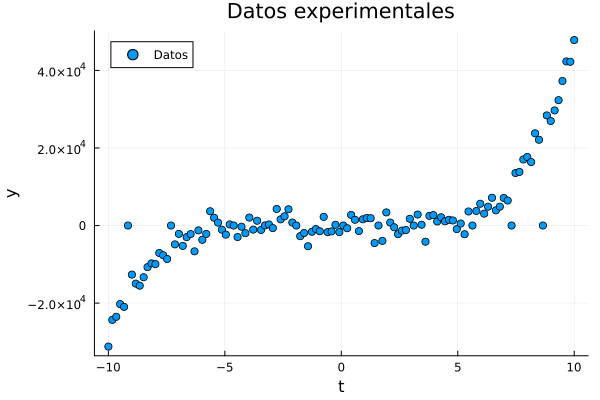

In [4]:
scatter(df.t, df.y, label="Datos", xlabel="t", ylabel="y", title="Datos experimentales")

Veamos a más detalles los datos que necesitamos predecir próximamente.

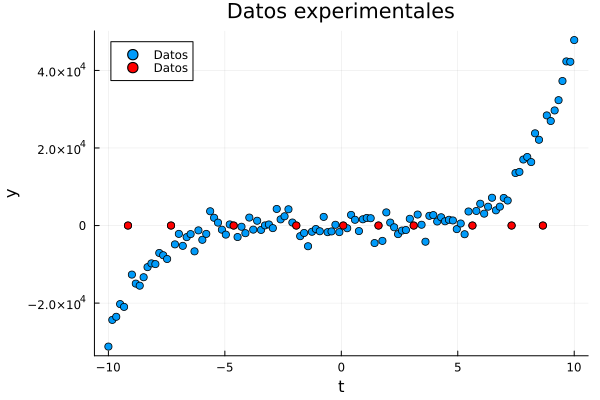

In [5]:
#get the indexes of the rows where y is 0
idx = findall(x -> x == 0, df.y)

#results 
scatter!(df.t[idx], df.y[idx], label="Datos", xlabel="t", ylabel="y", title="Datos experimentales", color=:red)

## 1b y 1c

Note que para no tener errores con las transformaciones que hay que hacer a los datos para linearizarlos tubimos que translador los datos por una constante, tanto en t, como en y. Esta es una operación invertible que efectuaremos más adelante, sin embargo, para que el código funcione, es necesario que los datos estén transladados.

In [6]:
y = df.y
t = df.t
nan_idxs = idx

#remove the rows where y is 0
y_clean = [y[i] for i in 1:length(y) if !(i in nan_idxs)]
t_clean = [t[i] for i in 1:length(t) if !(i in nan_idxs)] 
t_residual = [t[i] for i in 1:length(t) if i in nan_idxs]

#add offset to the data so that there are no negative values
y_clean = y_clean .+ offset_positive_y
t_clean = t_clean .+ offset_positive_t

start_t = minimum(t_clean)
end_t = maximum(t_clean)

#build the points list
clean_points = [(t_clean[i], y_clean[i]) for i in 1:length(t_clean)]

110-element Vector{Tuple{Float64, Float64}}:
 (1.0, 1.0)
 (1.1680672268907593, 6885.154937021798)
 (1.3361344537815096, 7686.9017176163)
 (1.5042016806722707, 10965.3199013761)
 (1.6722689075630193, 10239.937176583699)
 (2.0084033613445396, 18566.3751802017)
 (2.17647058823529, 16242.4422887695)
 (2.344537815126049, 15705.1357127378)
 (2.5126050420168102, 17886.6305427659)
 (2.6806722689075606, 20491.6904235221)
 (2.84873949579832, 21458.610590415898)
 (3.0168067226890702, 21275.86525542813)
 (3.1848739495798304, 24141.87077907814)
 ⋮
 (18.98319327731093, 48891.5850845142)
 (19.15126050420168, 47580.7423305017)
 (19.31932773109244, 54996.2836853369)
 (19.48739495798319, 53332.506314927305)
 (19.82352941176471, 59610.7496151593)
 (19.99159663865546, 58170.1225132698)
 (20.15966386554622, 60893.2333250083)
 (20.32773109243698, 63541.770520456805)
 (20.49579831932773, 68483.0226620999)
 (20.66386554621849, 73532.3231423672)
 (20.83193277310924, 73436.5250301558)
 (21.0, 79039.6753068571)

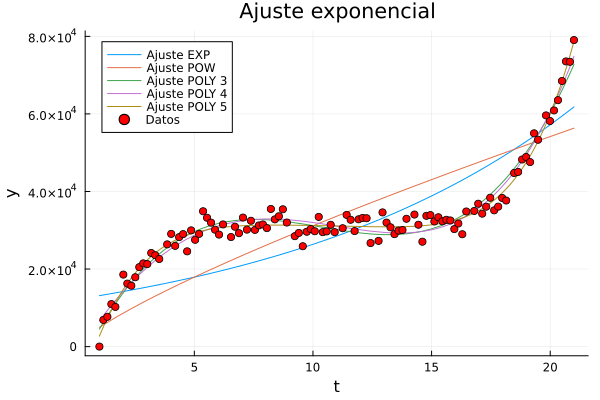

In [7]:
#build the exponential function
a0_exp, a1_exp = exp_regression(clean_points)
exp_fn = build_exp_fn(a0_exp, a1_exp)

#build power regression function 
a0_pow, a1_pow = power_regression(clean_points)
pow_fn = build_pow_fn(a0_pow, a1_pow)

#build polynomial regression - 3 degree
degree1 = 4
a1 = polynomial_regression(clean_points, degree1)
poly3_fn = build_poly_fn(a1)

#build polynomial regression - 4 degree
degree2 = 5
a2 = polynomial_regression(clean_points, degree2)
poly4_fn = build_poly_fn(a2)

#build polynomial regression - 5 degree
degree3 = 6
a3 = polynomial_regression(clean_points, degree3)
poly5_fn = build_poly_fn(a3)

plot(exp_fn, start_t, end_t, label="Ajuste EXP", xlabel="t", ylabel="y", title="Ajuste exponencial")
plot!(pow_fn, start_t, end_t, label="Ajuste POW", xlabel="t", ylabel="y", title="Ajuste potencial")
#plot!(gr_fn, start_t, end_t, label="Ajuste GR", xlabel="t", ylabel="y", title="Ajuste tasa de crecimiento")
plot!(poly3_fn, start_t, end_t, label="Ajuste POLY 3", xlabel="t", ylabel="y", title="Ajuste polinomial 3")
plot!(poly4_fn, start_t, end_t, label="Ajuste POLY 4", xlabel="t", ylabel="y", title="Ajuste polinomial 4")
plot!(poly5_fn, start_t, end_t, label="Ajuste POLY 5", xlabel="t", ylabel="y", title="Ajuste polinomial 5")

scatter!(t_clean, y_clean, label="Datos", xlabel="t", ylabel="y", title="Ajuste exponencial", color=:red)

Este es tan feito que se merece su plot aparte.

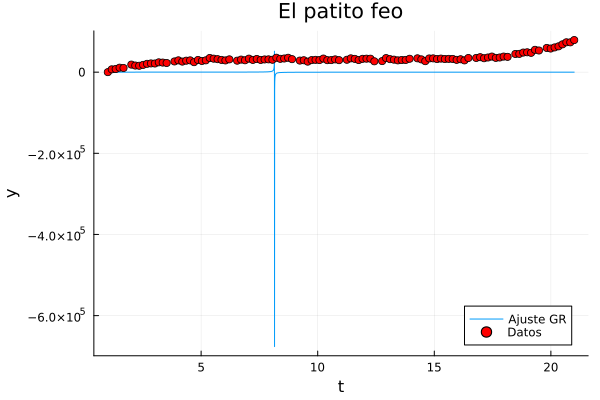

In [8]:
#build growth rate regression 
a0_gr, a1_gr = growth_rate_regression(clean_points)
gr_fn = build_growth_rate_fn(a0_gr, a1_gr)

plot(gr_fn, start_t, end_t, label="Ajuste GR", xlabel="t", ylabel="y", title="El patito feo")
scatter!(t_clean, y_clean, label="Datos", xlabel="t", ylabel="y", title="El patito feo", color=:red)

## 1d

Los mejores resultados claramente fueron los de la regresión polinomial, luego compararemos solo entre estas 3 opciones.

In [9]:
correlation_coef_poly3 = correlation_coefficient(poly3_fn, clean_points)
correlation_coef_poly4 = correlation_coefficient(poly4_fn, clean_points)
correlation_coef_poly5 = correlation_coefficient(poly5_fn, clean_points)

correlation_vector = vec([correlation_coef_poly3, correlation_coef_poly4, correlation_coef_poly5])
correlation_df = DataFrame(corr = correlation_vector, 
                           degree = [3, 4, 5])

Row,corr,degree
,Float64,Int64
1,0.978495,3
2,0.980489,4
3,0.986708,5


Podemos concluir que el mejor es el polinomio de 5 grados.
Hará falta entonces que apliquemos la trasnformación inversa para poder predecir los datos.

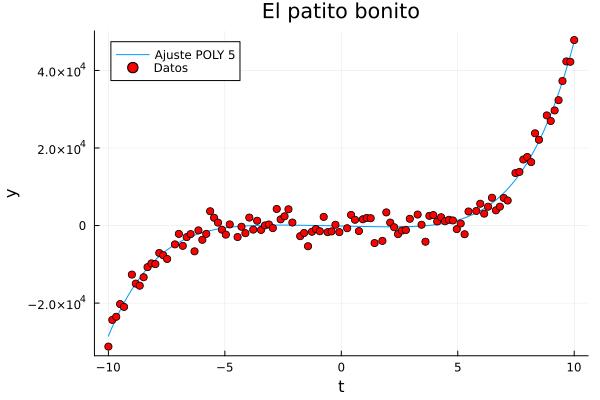

In [10]:
poly5_fn_transformed  = (t) -> poly5_fn(t + offset_positive_t) - offset_positive_y

t_original = t_clean.-offset_positive_t
y_original = y_clean.-offset_positive_y
start_og = minimum(t_original)
end_og = maximum(t_original)

plot(poly5_fn_transformed, start_og, end_og, label="Ajuste POLY 5", xlabel="t", ylabel="y", title="Ajuste polinomial 5")
scatter!(t_original, y_original, label="Datos", xlabel="t", ylabel="y", title="El patito bonito", color=:red)

Vamos a calcular los valores que antes eran inválidos:

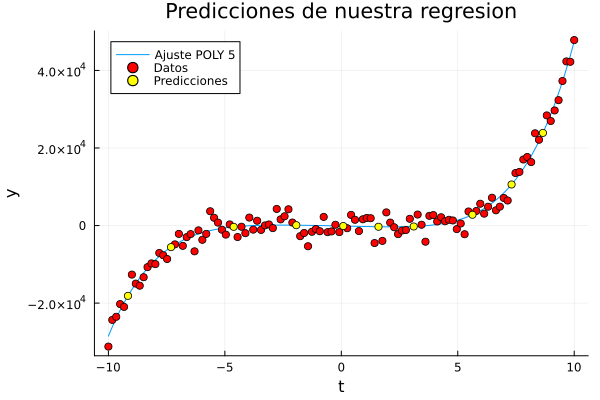

In [11]:
predictions = [poly5_fn_transformed(t) for t in t_residual]

plot(poly5_fn_transformed, start_og, end_og, label="Ajuste POLY 5", xlabel="t", ylabel="y", title="Ajuste polinomial 5")
scatter!(t_original, y_original, label="Datos", xlabel="t", ylabel="y", title="Predicciones de nuestra regresion", color=:red)
scatter!(t_residual, predictions, label="Predicciones", xlabel="t", ylabel="y", title="Predicciones de nuestra regresion", color=:yellow)

Como podemos ver esto funciona super bien, visualmente los datos se ajustan muy bien a la curva.

# 2

In [12]:
# Constants
k1 = 0+6
k2 = 06

# finite difference parameters
Δx = 0.02
Δt = 0.5

tmax = 2
lmax = 1
x0   = 0 
t0   = 0

x = x0:Δx:lmax
t = t0:Δt:tmax

a = Δt
b = k2*(Δx^2)

# Initial conditions
cond1 = [0, k2] #[x, y]
cond2 = [0, 10] #[t, y]

# fill the matrix
As = []
bs = []

#array of simbolic vars
@variables y[1:length(x), 1:length(t)+1]

# [y_{j+1, i} * a] + [y_{j, i}*(-2a+b)] + [y_{j-1, i}*a] + y_{j, i-1}*b 
for i in 2:length(t)+1
    A = zeros(length(x), length(t))
    b_ = zeros(length(x))

    # fill the first row
    row1 = [y[2,i]*a + y[1,i]*(b-2a) + y[1, i-1]*b]
    b_[1] = -k2*a

    # fill the second row
    row2 = y[3,i]*a + y[2,i]*(b-2a) + y[1,i]*a + y[2, i-1]*b

    #fill the third row
    row3 = y[4,i]*a + y[3,i]*(b-2a) + y[2,i]*a + y[3, i-1]*b

    #fill the fourth row
    row4 = y[5,i]*a + y[4,i]*(b-2a) + y[3,i]*a + y[4, i-1]*b

    #fill the last row
    row4 = y[5,i]*(b-2a) + y[4,i]*a*2 + y[5, i-1]*b

    push!(As, A)
    push!(bs, b_)
end

solve(As[1], bs[1])


LoadError: UndefVarError: `solve` not defined